In [1]:
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt

PROJ_ROOT =  os.path.join(os.pardir)

print(os.path.abspath(PROJ_ROOT))

d:\DANIELA\Projects\WIDS\covid-outcomes-research


In [2]:
#Let your audience know when this notebook was run, and with which packages. Useful when you are not sharing the notebook as
#executable code.

!pip install watermark

  Using cached watermark-2.3.0-py2.py3-none-any.whl (7.2 kB)


In [3]:
%load_ext watermark

In [4]:
%watermark -a "Daniela Alvarez Zegarra" -d -t -v -p numpy,pandas

Author: Daniela Alvarez Zegarra

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.2.0

numpy : 1.20.3
pandas: 1.4.1



In [5]:
#Documentation to know what other info can i get with watermark

%watermark?

In [3]:
#Let's print our requirements

print(open(os.path.join(PROJ_ROOT,'requirements.txt')).read())

# local package
-e .

# external requirements
click
Sphinx
coverage
awscli
flake8
python-dotenv>=0.5.1
jupyter
ipython
numpy
pandas
matplotlib
scikit-learn
scipy
pytest
nbdime
runipy
seaborn



## Loading the Data

In [4]:
covid_path = os.path.join(PROJ_ROOT,
                          "data",
                          "raw",
                          "dataset.csv")

dictionary_path = os.path.join(PROJ_ROOT,
                          "data",
                          "raw",
                          "data_dictionary.csv")

masterdata_path = os.path.join(PROJ_ROOT,
                          "data",
                          "MasterData.csv")

In [5]:
df = pd.read_csv(covid_path)
dictionary = pd.read_csv(dictionary_path)
masterdata = pd.read_csv(masterdata_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 93 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Unnamed: 0                                                                     3140 non-null   int64  
 1   fips                                                                           3140 non-null   int64  
 2   TOT_POP                                                                        3140 non-null   int64  
 3   0-9                                                                            3140 non-null   int64  
 4   0-9 y/o % of total pop                                                         3140 non-null   float64
 5   10-19                                                                          3140 non-null   int64  
 6   10-19 y/o % of total pop

In [10]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Columns: 114 entries, v1 to _merge
dtypes: float64(99), int64(9), object(6)
memory usage: 2.8+ MB


In [26]:
dictionary.head()

,Feature,Description,"NOTE: There are other possible features that can be included i.e. number of housing units, density of housing units, marital status, immigration, % rural/urban, but these are not available for every single county in the US so they are not used in the model. Additionally, the fips column is dropped before the model is run and added back afterwards."
0,fips,FIPS Code for the County,NaN
1,TOT_POP,Total Population,This data as well as all Age and Race data is ...
2,0-9,Population aged 0-9,All of the other age columns are the same but ...
3,0-9 y/o % of total pop,% of the population aged 0-9,NaN
4,10-19,NaN,NaN


In [14]:
df.head()


,Unnamed: 0,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,...,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+
0,0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,...,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6.0,55036,10523,19.1
1,1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,...,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51.0,203360,53519,26.3
2,2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,...,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5.0,26201,6150,23.5
3,3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,...,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0.0,22580,4773,21.1
4,4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,...,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6.0,57667,13600,23.6


# Milestone I: Exploratory data analysis

In [16]:
df.describe()

,Unnamed: 0,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,...,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+
count,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000
mean,1569.500000,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,...,52.698009,28.215940,1.655299,62.898806,44.393892,167.332629,23.817516,1.022266e+05,2.132298e+04,24.736943
std,906.584249,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,...,153.878850,86.409281,4.293436,214.737693,133.348667,543.035916,84.602028,3.283878e+05,6.140588e+04,5.564871
min,0.000000,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,...,0.025524,0.009726,0.001363,0.046773,0.030356,0.111759,0.000000,7.400000e+01,2.700000e+01,5.800000
25%,784.750000,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,...,5.439135,2.475921,0.248797,4.843825,5.312558,14.740077,0.000000,1.096700e+04,2.814750e+03,21.200000
50%,1569.500000,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,...,13.076544,5.969606,0.524404,12.386405,12.153987,36.223582,0.000000,2.570400e+04,6.310000e+03,24.400000
75%,2354.250000,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,...,35.215580,18.598497,1.311585,36.902489,31.312501,103.869345,12.000000,6.750075e+04,1.610625e+04,27.800000
max,3139.000000,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,...,3937.767709,2022.531916,91.712638,5713.007608,3882.586846,15014.048660,2126.000000,1.010572e+07,1.800341e+06,64.200000


c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


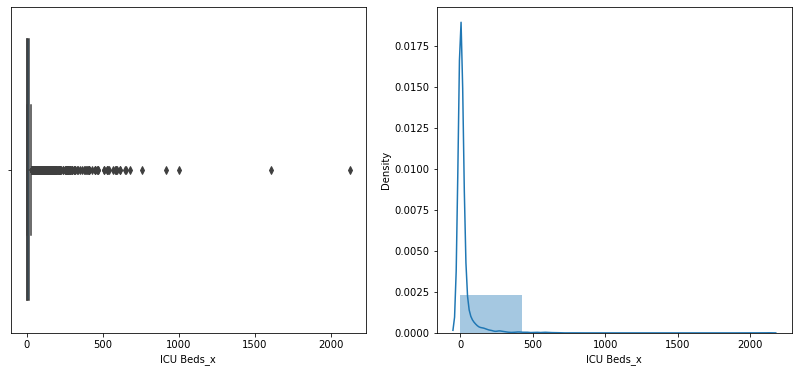

In [18]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(df['ICU Beds_x'])

plt.subplot(1,2,2)
sns.distplot(df['ICU Beds_x'], bins = 5)

plt.show()

## Data Cleaning

In [28]:
#for eda

def kde_plot(dataframe, variable, upper=None, lower=None, bw=0.1):
    '''Plots a density plot for a variable with optional upper and lower bounds on the data (inclusive)'''
    
    plot_data = dataframe [variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]
        
    sns.kdeplot(plot_data, bw=bw)
    
    plt.savefig(os.path.join(PROJ_ROOT, "reports", "figures","{}.png".format(variable)))
    plt.show()


C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


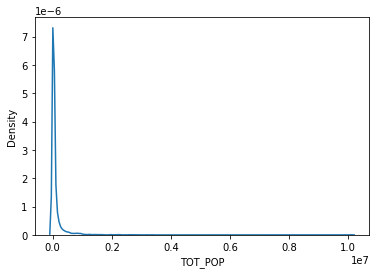

In [30]:
kde_plot(df, 'TOT_POP')

C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


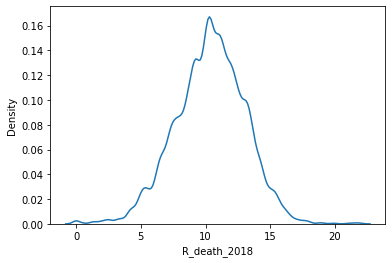

In [31]:
kde_plot(df, 'R_death_2018')

**Loading local development files**
If I am just loading local python files that I expect to use in this project, I add the src folder to the python  path using
sys.path.append. This tells Python to look in that folder for modules that we can import. This works well for local code and notebooks.

In [ ]:
#Load the autoreload extension
%load_ext autoreload

#always reload modules marked with %aimport
%autoreload 1

#add local python functions
import os
import sys

#add the src directory as one where we can import modules from
src_dir = os.path.join(os.getcwd(),os.pardir,"src")
sys.path.append(src_dir)

#import my method from the source code
%aimport features.build_features
from features.build_features import join_dataframes
from features.build_features import remove_invalid_data

**#lifehack If something goes wrong, use %debug**